#  <span style="color:red">****Student Grades Prediction****

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades


# Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.                  
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

# Dataset Link-
•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


<span style="color:red">****As from the problem statement , we get to know that we have to predict CGPA of a student based on different grades in four years,
Since CGPA is a continious data. Hence it is Regression problem.
We apply regression algorithm to train ,test and predict ****

# Python Implementation-

# <span style="color:Purple">****Importing Necessary Libraries****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\n The columns in the dataset:{df.columns}')

The rows and columns in the dataset:(571, 43)

 The columns in the dataset:Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


<span style="color:blue">****Observation-There are two column which are not in the form AB-XXX i.e HS-105/12 , HS-205/20 . So we need to rename these subjects in the followed pattern****

In [4]:
#Renaming subject code
df.rename(columns ={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)
print(f'\n The columns in the dataset:{df.columns}')


 The columns in the dataset:Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')


In [5]:
#Dropping 'Seat No.'column 
df.drop(['Seat No.'], axis=1, inplace=True)

In [6]:
# getting all information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    object 
 1   HS-101  571 non-null    object 
 2   CY-105  570 non-null    object 
 3   HS-105  570 non-null    object 
 4   MT-111  569 non-null    object 
 5   CS-105  571 non-null    object 
 6   CS-106  569 non-null    object 
 7   EL-102  569 non-null    object 
 8   EE-119  569 non-null    object 
 9   ME-107  569 non-null    object 
 10  CS-107  569 non-null    object 
 11  HS-205  566 non-null    object 
 12  MT-222  566 non-null    object 
 13  EE-222  564 non-null    object 
 14  MT-224  564 non-null    object 
 15  CS-210  564 non-null    object 
 16  CS-211  566 non-null    object 
 17  CS-203  566 non-null    object 
 18  CS-214  565 non-null    object 
 19  EE-217  565 non-null    object 
 20  CS-212  565 non-null    object 
 21  CS-215  565 non-null    object 
 22  MT

<span style="color:BLUE">****Observation -There are two data types present in  dataset:(float64,Object)****                   
 <span style="color:blue">****- All Columnn has null values except 'PH-121', 'HS-101', 'CS-105', 'CGPA' column.****

In [7]:
#checking the null values in each column
df.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

 <span style="color:blue">****- All Columnn has null values except 'PH-121', 'HS-101', 'CS-105', 'CGPA' column. Lets fill it
    by using mode method , hence they are categorical data.****

In [8]:
#Filling Null Values
column_name=['CY-105', 'HS-105', 'MT-111', 
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
for column in column_name:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
#Verify the null values in each column
df.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

<span style="color:blue">****There is no Null values. Lets go ahead.****

In [10]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 0


<span style="color:blue">****There is no Dublicate rows.****

In [11]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64


A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


A-    118
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A

<span style="color:red">****A "WU" grade means "Withdrawal Unauthorized".
It indicates that a student did not officially withdraw from a course and failed to complete course requirements.
For GPA computation, a WU grade is equivalent to an F****

<span style="color:red">****A "W" grade is GPA-neutral, meaning it doesn't affect a student's GPA.
Students also don't earn credits for the course****                 
    
We encode "W" as "0" later

In [12]:
#Replacing "WU" with "F"
df= df.replace(['WU'], 'F')

# <span style="color:purple">Data Visualization

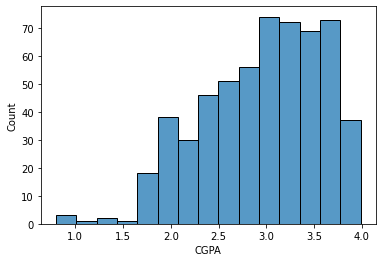

In [13]:
sns.histplot(x='CGPA' , data = df)
plt.show()

Most of student has secure CGPA from 2.3 to 3.7

# <span style="color:Purple">****Encoding Categorical Value in Numerical Value****

In this dataset , all the values are categorical except for CGPA .
As system only understands numerical data , so we have to encode these categorical data to numerical
so that model can understand the pattern and make the prediction.

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# <span style="color:Purple">****Seperating Feature and Label**** 

In [15]:
#Seperating Feature and label into x and y
x=df.drop(['CGPA'],axis=1)
y=df['CGPA']

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (571, 41)
Target Dimension : (571,)


# <span style="color:Purple">****Feature Scaling Using Standard Scaler**** 

In [16]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.402729,1.770900,1.732986,0.552340,1.382190,2.657832,1.797558,1.341505,0.419492,1.028132,...,0.665333,1.173249,1.155824,1.533685,0.958939,-0.399755,-0.960095,1.740513,-0.346121,-0.450178
1,-1.244538,1.411559,2.411679,1.492855,0.372944,1.173242,1.797558,-1.311307,2.302589,1.347015,...,1.718675,1.770064,1.521056,0.862110,1.325686,-0.399755,1.042149,0.900418,0.727983,-0.021043
2,-1.244538,-0.744483,-0.981788,0.238835,0.036528,-1.053643,0.324425,0.015099,-0.710366,-0.885166,...,-0.739123,-0.318789,-0.670339,-1.152616,0.225444,-1.214969,-0.960095,-1.619869,-0.704156,-1.308446
3,1.720543,0.692879,2.411679,1.492855,1.718606,-0.311348,2.165841,1.341505,1.925970,0.709249,...,1.367561,1.770064,0.425358,2.205260,0.958939,0.823066,0.241251,1.320466,1.086017,1.695494
4,-0.585631,-1.103823,-0.303094,-0.074670,-1.309133,-1.053643,-0.780425,0.015099,-1.463605,-0.885166,...,-0.739123,0.278026,-0.305107,0.190534,-0.141304,-0.399755,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256177,-1.822504,-0.981788,-0.701680,-0.972718,-1.053643,-0.780425,-0.648104,-1.086986,-0.247400,...,-0.036895,-0.617197,-1.035572,-1.152616,-1.975041,-1.214969,0.641700,0.060322,-0.346121,-1.308446
567,-0.915084,-1.822504,-0.981788,-1.328691,-1.309133,-1.053643,-1.516992,-0.648104,-1.463605,-1.522931,...,-0.739123,-0.020382,-0.305107,-1.152616,-1.975041,-0.399755,0.241251,-0.779774,0.727983,-0.450178
568,-0.256177,-1.822504,-0.303094,-0.074670,-1.309133,-1.053643,-1.516992,-1.311307,-1.463605,-0.566283,...,-0.036895,-0.617197,-0.670339,-1.152616,-0.508051,-1.214969,1.442597,0.060322,-0.704156,-0.450178
569,-1.244538,-0.385142,2.072333,-1.328691,1.718606,2.657832,0.324425,1.341505,0.419492,1.028132,...,-0.036895,1.471656,-0.670339,-0.145253,0.958939,2.453495,1.442597,-0.359726,0.369948,1.266360


# <span style="color:purple">****Split the data into training and testing sets****

In [17]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = .30, random_state = 48)
print("Total Size Of Feature in Dataset :",x_scaled.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (571, 41)
Total Size Of Training Feature Dataset :  (399, 41)
Total Size Of Testing Feature Dataset :  (172, 41)
Total Size Of Label in Dataset : (571,)
Total Size Of Training Label Dataset :  (399,)
Total Size Of Testing Label Dataset :  (172,)


# <span style="color:purple">****Create one function and call as many as times to check score of different model****

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_score(model_name,x_train,x_test,y_train,y_test, train=True):
    if train: #checking training score 
        y_pred_train=model_name.predict(x_train)
        
        print("\n*********************Train Result*********************")
        
        print("R2 Score on train data:",r2_score(y_train,y_pred_train)*100)
        
    elif train==False: #checking testing score 
        y_pred_test=model_name.predict(x_test)
        
        print("\n*********************Test Result*********************")
        
        print("R2 Score on test data:",r2_score(y_test,y_pred_test)*100)
        print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_test)*100)
        print("Mean Squared Error :",mean_squared_error(y_test,y_pred_test)*100)
        print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred_test))*100)  

# LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
model_score(LR,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(LR,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 91.88604722169981

*********************Test Result*********************
R2 Score on test data: 95.10541360184229
Mean Absolute Error : 9.904914268396896
Mean Squared Error : 1.6405243130565124
Root Mean Squared Error : 12.808295409836987


# Ridge

In [20]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
model_score(ridge,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(ridge,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 91.88595013686674

*********************Test Result*********************
R2 Score on test data: 95.13221865725546
Mean Absolute Error : 9.87485111684159
Mean Squared Error : 1.6315400309249943
Root Mean Squared Error : 12.773175137470691


# DecisionTreeRegressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree = DecisionTreeRegressor()
Decision_tree.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
model_score(Decision_tree,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(Decision_tree,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 100.0

*********************Test Result*********************
R2 Score on test data: 83.28464175750292
Mean Absolute Error : 18.135465116279068
Mean Squared Error : 5.602506395348838
Root Mean Squared Error : 23.66961426671089


# RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
model_score(random_forest,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(random_forest,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 98.69251796857144

*********************Test Result*********************
R2 Score on test data: 94.23091394626823
Mean Absolute Error : 9.778197674418614
Mean Squared Error : 1.9336313970930261
Root Mean Squared Error : 13.905507531525146


# AdaBoostRegressor

In [23]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(x_train,y_train)
#Call the function and pass datset to check train and test score 
model_score(adaboost,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(adaboost,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 93.67866574669866

*********************Test Result*********************
R2 Score on test data: 90.4336929371985
Mean Absolute Error : 14.84349278550831
Mean Squared Error : 3.2063504545751056
Root Mean Squared Error : 17.906285082548823


# Support Vector Regression (SVR)


In [24]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
#Call the function and pass datset to check train and test score 
model_score(svm,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(svm,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 96.26087628201368

*********************Test Result*********************
R2 Score on test data: 96.58770330155136
Mean Absolute Error : 7.964262151359014
Mean Squared Error : 1.143703520950106
Root Mean Squared Error : 10.694407514912204


# <span style="color:red">****Cross-Validation score- to check if the model is overfitting****

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
#Linear Regression
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(LR,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(LR,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.89003888 0.92909614 0.89931028 0.93831969 0.84947591]
Overall Cross-Validation score : 0.9012481794405135


In [27]:
#Ridge Regression
print("Cross-Validation score of each fold of Dataset:",cross_val_score(ridge,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(ridge,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.89021099 0.92911464 0.8995237  0.93870707 0.84960426]
Overall Cross-Validation score : 0.9014321318130818


In [28]:
#Decision tree Regressor
print("Cross-Validation score of each fold of Dataset :",cross_val_score(Decision_tree,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(Decision_tree,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset : [0.80305569 0.84226741 0.91132306 0.76817789 0.72870536]
Overall Cross-Validation score : 0.7902013299282153


In [29]:
#RandomForestRegressor
print("Cross-Validation score of each fold of Dataset :",cross_val_score(random_forest,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(random_forest,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset : [0.90172628 0.92354285 0.94013725 0.92873971 0.84614561]
Overall Cross-Validation score : 0.9079561648103684


In [30]:
#AdaBoostRegressor
print("Cross-Validation score of each fold of Dataset-",cross_val_score(adaboost,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(adaboost,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset- [0.84668809 0.89523159 0.89432557 0.88281913 0.80643861]
Overall Cross-Validation score : 0.8697679087793648


In [31]:
#Support Vector Regression
print("Cross-Validation score of each fold of Dataset-",cross_val_score(svm,x_scaled,y,cv=5))
print("Overall Cross-Validation score -",cross_val_score(svm,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset- [0.89618542 0.92587337 0.91105923 0.93984077 0.85727949]
Overall Cross-Validation score - 0.9060476576100086


# <span style="color:green">Conclusion-Support Vector Regression perform best in this dataset with minimum error.

# Saving Model

In [119]:
import joblib
joblib.dump(LR,'Model for Student grades prediction')

['Model for Student grades prediction']

# Model Prediction


In [120]:
svr_model = joblib.load('Model for Student grades prediction')
Student_grades_prediction = svr_model.predict(x_test)
Student_grades_prediction

array([3.99602653, 3.29961578, 2.87718144, 3.29380997, 2.36400742,
       2.81776957, 3.39163539, 2.03960022, 2.61540927, 1.95325609,
       3.33397961, 3.04940513, 2.48726429, 2.50943268, 3.39443678,
       2.87140261, 3.89534624, 3.2893567 , 2.490805  , 3.80871474,
       2.80689761, 3.0765797 , 3.16524379, 2.80081926, 3.61525479,
       2.25551211, 2.99782079, 2.69759392, 3.19437107, 3.64714866,
       3.39397351, 3.21139664, 3.25938875, 3.62568235, 3.06694982,
       1.64585586, 3.51152537, 3.18465454, 3.23990018, 3.0663076 ,
       2.82591927, 2.10687588, 2.4971073 , 3.02158117, 2.46905596,
       3.08906364, 3.07666647, 2.64224285, 3.29384764, 2.55285802,
       3.26108277, 2.97533516, 1.57727756, 2.25457822, 3.04955241,
       2.52501799, 2.85048338, 2.14342428, 3.33834087, 2.8152782 ,
       2.11623588, 1.82095933, 2.87251083, 2.80933271, 2.50263771,
       3.38176654, 2.25980842, 2.10330881, 3.74647631, 3.66276218,
       2.71079561, 3.23392645, 2.22346076, 2.56987775, 2.75773

In [123]:
test_data = np.array(y_test)
Student_grades = pd.DataFrame({'predicted': Student_grades_prediction,'original':test_data})
Student_grades

,predicted,original
0,3.996027,3.963
1,3.299616,3.358
2,2.877181,2.947
3,3.293810,3.424
4,2.364007,2.146
...,...,...
167,3.222966,3.335
168,3.362973,3.339
169,3.194485,3.149
170,2.181781,2.087


# <span style="color:green">Predicted and Orignal data are almost equal.

# End